                    ###########################################
                    ############___ELGHAZI_SOUFIANE___#########
                    ###########################################

# Assignment 2: Comparing Simple and Multiple Linear Regression Models


### 1.Start by importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_squared_error
import warnings

##to delete the warnings to avoid the deprecated warning on the dataset
warnings.simplefilter(action='ignore', category=FutureWarning)

   ### 2.Load the California Housing dataset using fetch_california_housing and store the feature variables in a dataframe   named X and the target variable in a dataframe named y.


In [2]:
##Next, we'll load and comprehend the california housing data from the scikit-learn library
california_housing = fetch_california_housing(as_frame=True)
california_housing # dictionnaire!!!

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [3]:
# let's check what it contains
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
california_housing.feature_names ### feature_names: Contains the names of all the features in the dataset

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
##DESCR: Includes a detailed explanation of the dataset, such as the basic definition of features, what each feature means, which features operate as target variables, whether there are any missing values in the dataset, the dataset's source, and author, and so on.
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [6]:
##The next step is to turn the dataset into a dataframe using pd.DataFrame will allow us to preprocess and visualize the data while also locating acceptable features for prediction
california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [7]:
## voir les premiers 5 lignes 
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


####  4-1Choose 'MedInc' as the independent variable.
#### 5-1 Choose the independent variables 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude' and 'Longitude'.


In [8]:
## we will add the column 'MedianHouseValue' which contains the values of target features.
california['MedianHouseValue'] = california_housing.target
        ##############################
## x_multiple contients les variables indépendantes sauf 'MedianHouseValue'    
x_multiple = california.drop(columns=['MedianHouseValue'])
        ##############################
## x_simple contient la variable 'MedInc'     
x_simple = california['MedInc']
        ##############################
## notre target
y = california['MedianHouseValue']


In [9]:
## afin de voir dataframe apres l'ajout du MedianHouseValue(target)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
## les valeurs de notre variable dépendante (MedianHouseValue)
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64

In [11]:
## les variables indépendantes
x_multiple.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
## la variable independante MedInc
x_simple.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: MedInc, dtype: float64

###  3. Split the data into training and testing sets using train_test_split with test_size = 0.2 and random_state = 42.

#### 4-1 Create new dataframes X_simple and X_test_simple that contain only the 'MedInc' column from X_train and X_test respectively.
#### 5-1 Create new dataframes X_multi and X_test_multi that contain only the chosen independent variables from X_train and X_test respectively.


In [13]:
## 4-1:
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(x_simple, y, test_size = 0.2, random_state=42)
## 5-1:
x_multiple_train, x_multiple_test, y_multiple_train, y_multiple_test = train_test_split(x_multiple, y, test_size = 0.2, random_state=42)


###                                                          4.Simple Linear Regression:

#### 4-3.Train the simple linear regression model using X_simple and y_train.

In [14]:
###                            Transform the inputs into a matrix (2D object)
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)
x_simple_train_reshaped = x_simple_train.values.reshape(-1,1)
x_simple_test_reshaped = x_simple_test.values.reshape(-1,1)
#########################################
regressor_simple = LinearRegression()
regressor_simple.fit(x_simple_train_reshaped, y_simple_train)

LinearRegression()

#### 4-4.Predict using the testing set and store the predictions in a dataframe named y_pred_simple.

In [15]:
# model evaluation for Test set
y_pred_simple = regressor_simple.predict(x_simple_test_reshaped)
y_pred_simple

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

#### 4-5.Print the coefficients and R-squared value of the model.

In [16]:
print("The value of the Intercept is ------->",regressor_simple.intercept_)
print("<------------------------------------------------------------------------------------------->")
print("The set of coefficients are ------->",regressor_simple.coef_)

The value of the Intercept is -------> 0.44459729169078677
<------------------------------------------------------------------------------------------->
The set of coefficients are -------> [0.41933849]


In [17]:
# r-squared score of the model
r2_simple = r2_score(y_simple_test, y_pred_simple)
print("The model's testing set performance are :")
print("------------------------------------------------")
print('R2 score is : {}'.format(r2_simple))
print("--------------------------------------")
# mean_squared_error of the model ----> c'est la même chose que np.mean((y_predict-y_test)**2) ce qui s'appelle fonction du coût
rmse_simple = (np.sqrt(mean_squared_error(y_simple_test, y_pred_simple)))
print('RMSE score is : {}'.format(rmse_simple))
print("--------------------------------------")

The model's testing set performance are :
------------------------------------------------
R2 score is : 0.45885918903846656
--------------------------------------
RMSE score is : 0.8420901241414454
--------------------------------------


#### 4-6.Create a scatter plot to visualize the relationship between 'MedInc' and 'MedianHouseValue'.

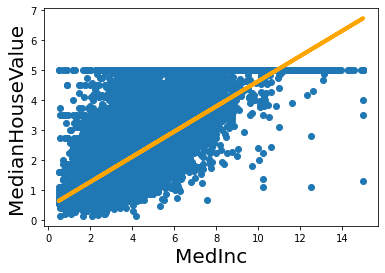

In [18]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x_simple,y)

# Parametrized version of the regression line

yhat = regressor_simple.coef_*x_simple + regressor_simple.intercept_

# Non-parametrized version of the regression line

# Plotting the regression line
fig = plt.plot(x_simple,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('MedInc', fontsize = 20)
plt.ylabel('MedianHouseValue', fontsize = 20)
plt.show()

###                                                         5. Multiple Linear Regression:

#### 5-3.Train the multiple linear regression model using X_multi and y_train

In [19]:
# model training for training set
regressor_multiple = LinearRegression()
regressor_multiple.fit(x_multiple_train, y_multiple_train)

LinearRegression()

#### 5-4.Predict using the testing set and store the predictions in a dataframe named y_pred_multi.

In [20]:
# model evaluation for Test set
y_pred_multi = regressor_multiple.predict(x_multiple_test)
y_pred_multi

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

#### 5-5.Print the coefficients and R-squared value of the model.

In [21]:
print("The value of the Intercept is ------->",regressor_multiple.intercept_)
print("<------------------------------------------------------------------------------------------->")
print("The set of coefficients are ------->",regressor_multiple.coef_)

The value of the Intercept is -------> -37.023277706064135
<------------------------------------------------------------------------------------------->
The set of coefficients are -------> [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [22]:
# r-squared score of the model
r2_multiple = r2_score(y_multiple_test, y_pred_multi)
print("The model's testing set performance are :")
print("------------------------------------------------")
print('R2 score is : {}'.format(r2_multiple))
print("--------------------------------------")
# mean_squared_error of the model ----> c'est la même chose que np.mean((y_predict-y_test)**2) ce qui s'appelle fonction du coût
rmse_multiple = (np.sqrt(mean_squared_error(y_multiple_test, y_pred_multi)))
print('RMSE score is : {}'.format(rmse_multiple))
print("--------------------------------------")

The model's testing set performance are :
------------------------------------------------
R2 score is : 0.5757877060324512
--------------------------------------
RMSE score is : 0.745581383012776
--------------------------------------


#### 5-6. Create a scatter plot to visualize the relationship between the independent variables and 'MedianHouseValue'.

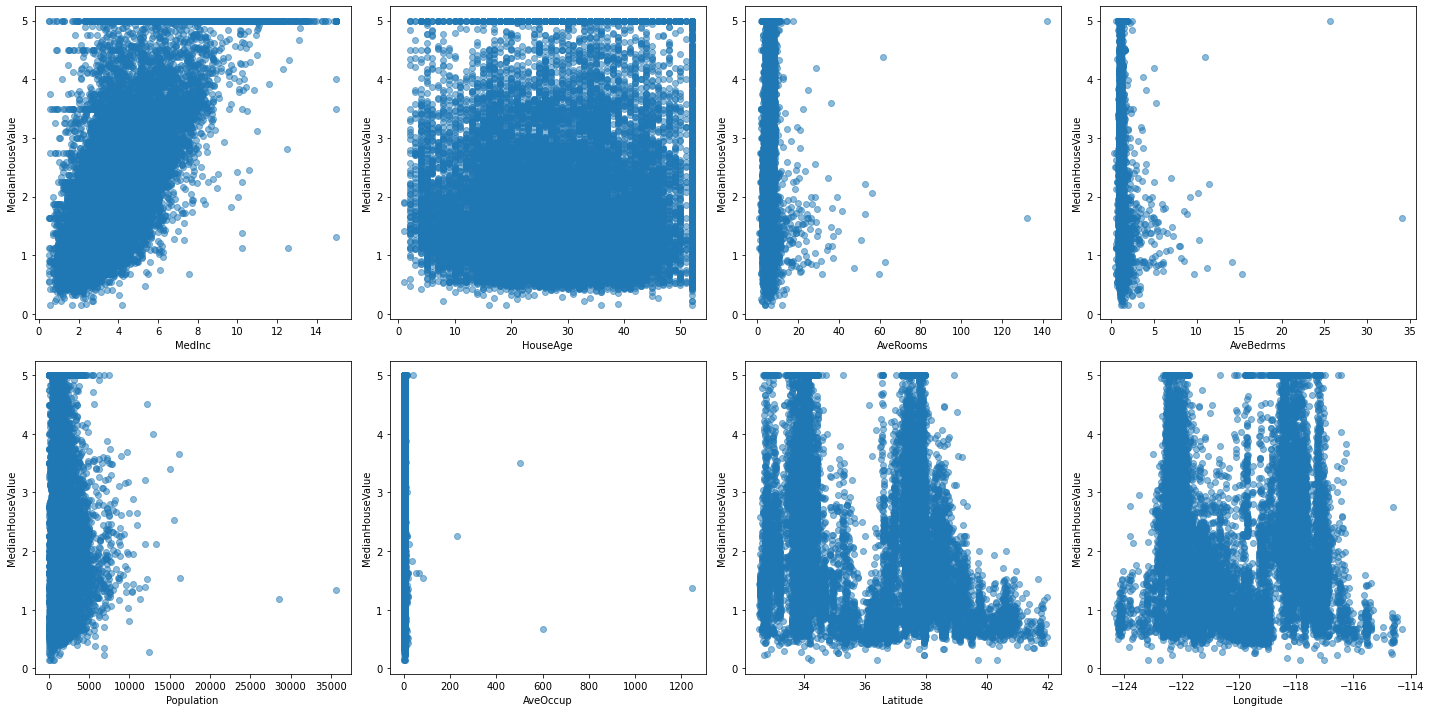

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for i in range(len(x_multiple.columns)):
    axs[i].scatter(x_multiple[x_multiple.columns[i]],y,alpha=0.5)
    axs[i].set_xlabel(x_multiple.columns[i])
    axs[i].set_ylabel('MedianHouseValue')
plt.tight_layout()
plt.show()

### 6. Compare the performance of the two models by evaluating the R-squared value and mean squared error of each model and discuss the effect of including multiple independent variables on the model

    pour le modele de regression simple la valeur de R2_simple=0.45885918903846656 et la valeur deRMSE_simple=0.8420901241414454

    alors que pour le modèle de regression multiple R2_multiple = 0.5757877060324512 et RMSE_multiple = 0.745581383012776

    alors R2_simple<R2_multiple et RMSE_multiple<RMSE_simple. alors R2 est augmenter et RMSE est diminuer ce que signifie que

    l'ajout des autres variables a contribuer à l'amélioration du performance du modele .

### 7. Write a conclusion summarizing the results of the lab and discussing the difference between simple and multiple linear regression models.

    D'après les résultats trouvé dans les deux modèles,Après l'ajout des autres variables ,la valeur de R2 a augmenter et comme nous savons ,lorsque la valeur de R2 tend vers 1 le modèle est bon, alors que les erreurs doivent être minimiser ,et c'est le case pour le RMSE qui est diminuer dans la regression multiple .

    Alors,la régression linéaire multiple est un calcul plus spécifique que la régression linéaire simple. Pour les relations directes, une régression linéaire simple peut facilement capturer la relation entre les deux variables. Pour les relations plus complexes nécessitant plus de considération, la régression linéaire multiple est souvent préférable.

### 8. What are the pros and cons of using a multiple linear regression model?

#### Advantages:

L'analyse de régression multiple permet aux chercheurs d'évaluer la force de la relation entre un résultat (la variable dépendante) et plusieurs variables prédictives ainsi que l'importance de chacun des prédicteurs dans la relation, souvent avec l'effet d'autres prédicteurs statistiquement éliminés.

#### Inconvénients:

Tout inconvénient de l'utilisation d'un modèle de régression multiple se résume généralement aux données utilisées. Deux exemples de ceci utilisent des données incomplètes et concluent à tort qu'une corrélation est une causalité.